# Spatial correlation analysis with Pysal

## Readying and tidying data

In [11]:
# this cell contains our library imports
import pandas as pd
import altair as alt
import geopandas as geopandas
import contextily as cx
import folium as folium
from pysal.viz import mapclassify
from libpysal import weights
from splot.libpysal import plot_spatial_weights
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import esda as esda

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
data = pd.read_csv('brussels-data-export.csv', sep = ';', decimal = ',')

In [3]:
data = data.query('fiscal_income > 0')

In [4]:
districts = geopandas.read_file('URBIS_ADM_MD/UrbAdm_MONITORING_DISTRICT.shp')

In [5]:
districts_joined = districts.merge(data, left_on = 'ID', right_on = 'code')

## Spatial weights & global autocorrelation

In [6]:
districts_weights_distance = weights.DistanceBand.from_dataframe(districts_joined, 2500)
districts_weights_distance.transform = 'R'
districts_joined['lagged_distance_fiscal_income'] = weights.lag_spatial(districts_weights_distance, districts_joined['fiscal_income'])

In [13]:
morans_i = esda.Moran(districts_joined['fiscal_income'], districts_weights_distance)
morans_i.I, morans_i.p_sim

(0.3990163102518503, 0.001)

In [8]:
districts_joined['lagged_distance_fiscal_income'] = weights.lag_spatial(districts_weights_distance, districts_joined['fiscal_income'])

In [9]:
chart = alt.Chart(districts_joined)
chart.mark_point().encode(
    x = 'fiscal_income',
    y = 'lagged_distance_fiscal_income'
)

alt.Chart(...)

## Local autocorrelation

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Moran Scatterplot (0.4)'}, xlabel='Attribute', ylabel='Spatial Lag'>)

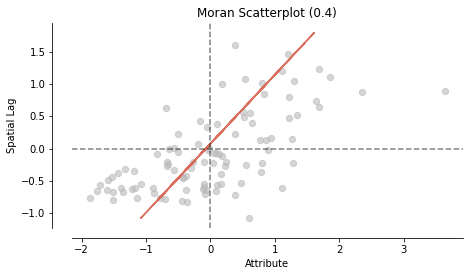

In [14]:
moran_scatterplot(morans_i)

In [15]:
morans_i_local = esda.Moran_Local(districts_joined['fiscal_income'], districts_weights_distance)

In [27]:
morans_i_local.q

array([3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 1, 3,
       4, 3, 2, 3, 3, 4, 3, 3, 3, 2, 4, 2, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 4, 3, 3, 3, 4,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
morans_i_local.Is

array([ 1.91771533e-01,  5.90764332e-01,  7.57413044e-01,  1.19811746e+00,
        1.90320084e-01,  5.91600158e-01,  1.51730345e-01,  1.60788325e-01,
       -6.40625981e-01, -1.79410368e-01,  8.19329015e-04, -5.86781262e-02,
       -9.77930966e-03, -2.78320752e-01,  5.83161693e-01,  5.99404385e-02,
       -9.20850623e-02,  9.00083272e-01,  2.42408942e-01,  1.41434542e+00,
        2.60428829e-01,  1.84877702e-01, -1.98861434e-02,  2.92639443e-01,
       -1.42512484e-02,  7.73663195e-01,  9.47152829e-01, -6.67819550e-02,
        5.79045649e-02,  4.82961721e-02,  7.18574568e-01, -4.49293382e-04,
       -2.47762241e-02, -1.12033862e-01, -4.98024982e-02,  4.10491055e-01,
        2.04230756e-02,  2.76070415e-02,  4.01461630e-01, -5.59057005e-03,
       -8.56260156e-05,  1.00801184e+00,  1.83593437e-01,  6.66238049e-01,
       -2.47595660e-01,  9.12958811e-02,  5.29672913e-01,  1.14915961e+00,
        8.33596151e-01, -6.70532866e-01, -2.75888086e-01,  1.35917812e-01,
        3.59235661e-01,  

In [29]:
morans_i_local.p_sim

array([0.047, 0.007, 0.01 , 0.001, 0.075, 0.002, 0.247, 0.343, 0.062,
       0.274, 0.485, 0.016, 0.233, 0.19 , 0.003, 0.005, 0.035, 0.001,
       0.011, 0.001, 0.119, 0.024, 0.335, 0.001, 0.359, 0.007, 0.003,
       0.024, 0.227, 0.003, 0.001, 0.444, 0.458, 0.158, 0.114, 0.055,
       0.127, 0.389, 0.031, 0.404, 0.486, 0.002, 0.047, 0.004, 0.002,
       0.031, 0.001, 0.001, 0.001, 0.001, 0.001, 0.128, 0.001, 0.001,
       0.014, 0.001, 0.001, 0.368, 0.266, 0.437, 0.465, 0.252, 0.004,
       0.002, 0.002, 0.009, 0.061, 0.039, 0.002, 0.09 , 0.001, 0.001,
       0.003, 0.031, 0.002, 0.015, 0.422, 0.188, 0.23 , 0.059, 0.185,
       0.04 , 0.378, 0.093, 0.043, 0.231, 0.26 , 0.043, 0.091, 0.004,
       0.044, 0.001, 0.001, 0.053, 0.009, 0.014, 0.025])

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>)

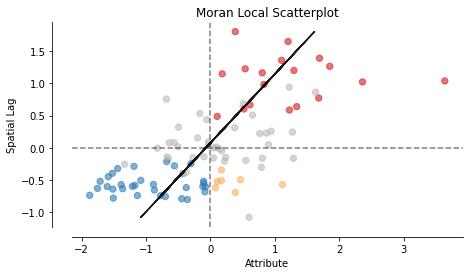

In [32]:
moran_scatterplot(morans_i_local, p = 0.05)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

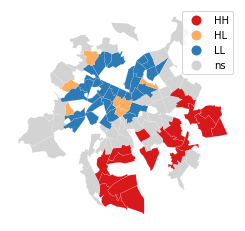

In [33]:
lisa_cluster(morans_i_local, districts_joined, p=0.05)

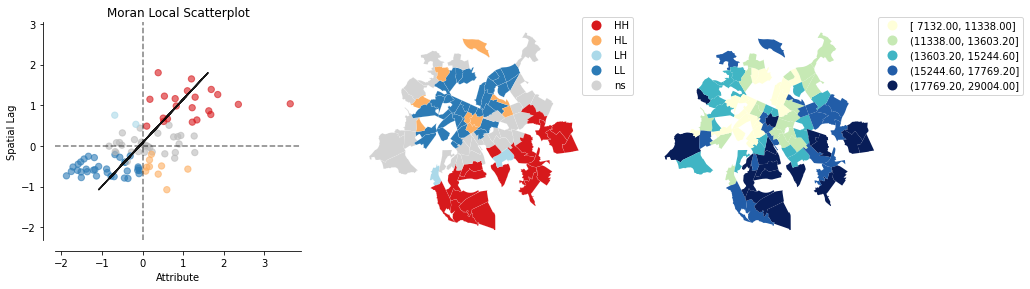

In [35]:
plot_local_autocorrelation(morans_i_local, districts_joined, 'fiscal_income', p = 0.05);

<AxesSubplot:>

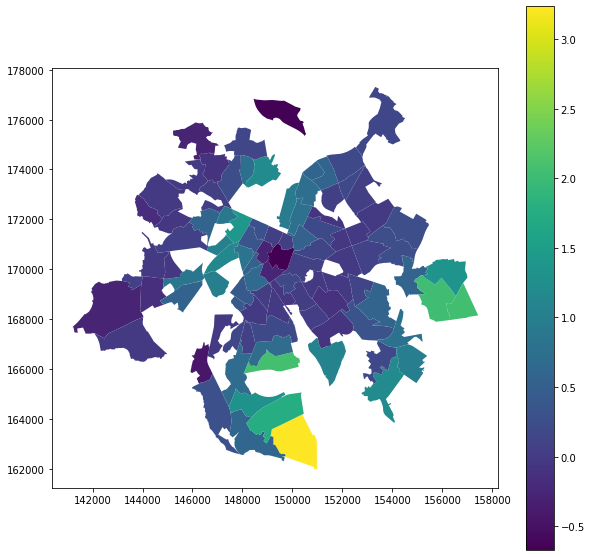

In [30]:
districts_joined['mi_local'] = morans_i_local.Is
districts_joined.plot(column = 'mi_local', figsize = [10, 10], legend = True)